In [1]:
import pandas as pd

from paths import *
from exploration import *

In [2]:
# from data_preparation import get_category_info
# colorScale, categoryName, AQScale = get_category_info()

In [3]:
# from data_preparation import get_metadata, get_series,clip_missing_prone_values, prepare_division_and_country_series
#
# series_with_heavy_missing, metadata_with_heavy_missing = get_series(), get_metadata()
# division_missing_counts, metadata, series = clip_missing_prone_values(metadata_with_heavy_missing, series_with_heavy_missing)
# region_series, metadata_region, country_series, metadata_country = prepare_division_and_country_series(series,
#                                                                                                        metadata)

In [2]:
from data_preparation import read_region_and_country_series
region_series, metadata_region, country_series, metadata_country = read_region_and_country_series()

In [5]:
# series.shape

In [3]:
region_series.shape[0]

46704

In [4]:
country_series.shape

(46704, 2)

In [42]:
# missing_data_heatmap(country_series)

In [43]:
# missing_data_heatmap(region_series)

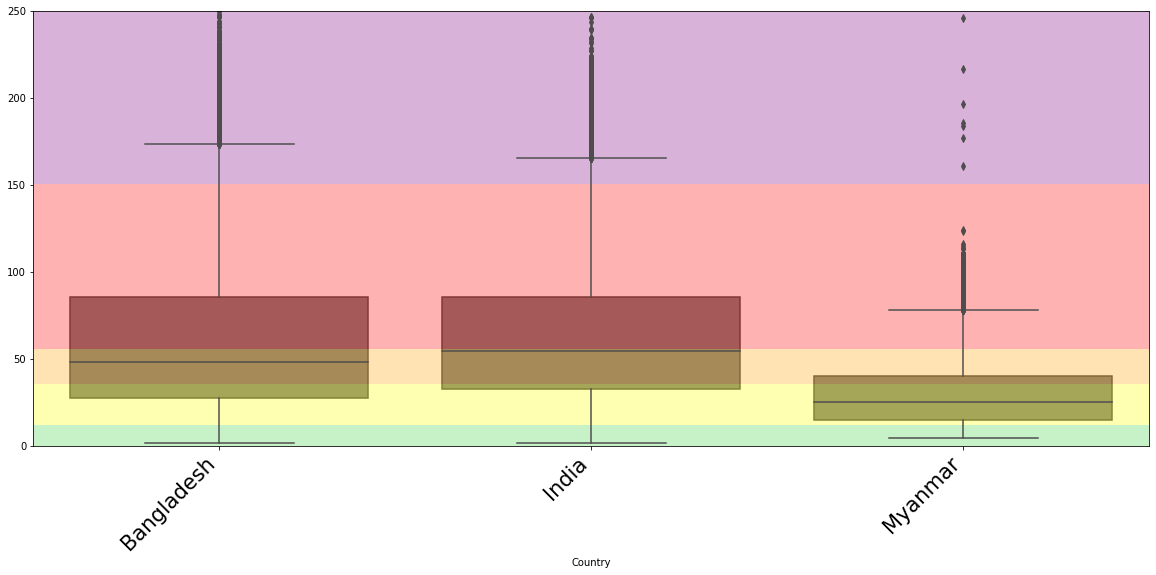

In [44]:
from exploration import box_plot_series

box_plot_series(country_series)

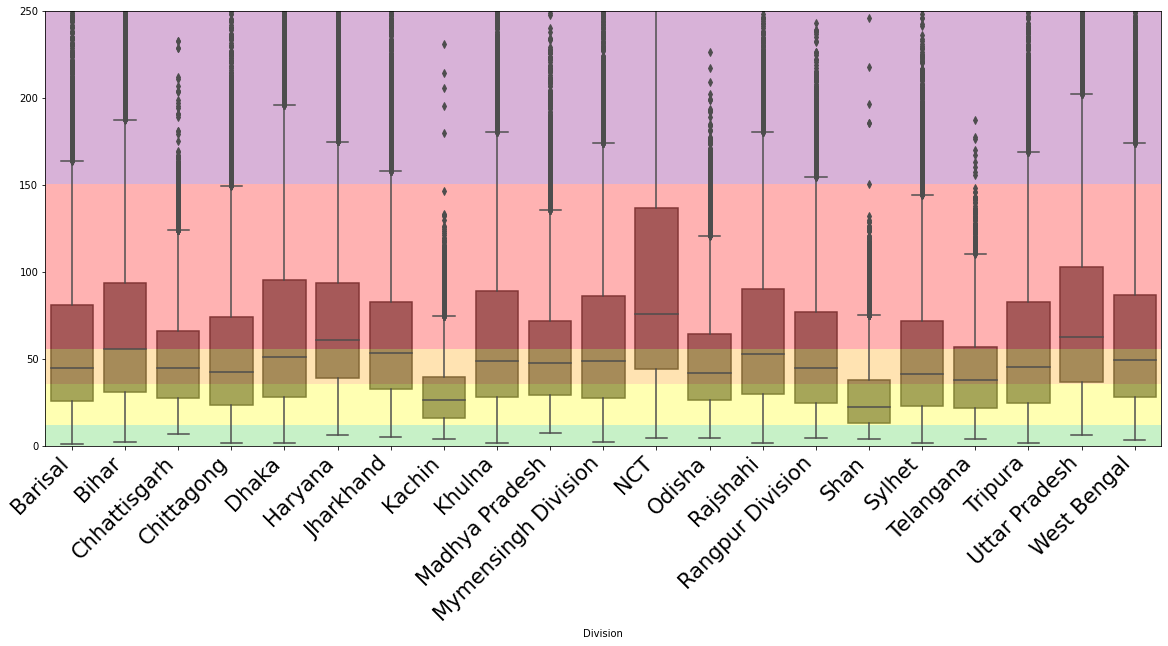

In [45]:
box_plot_series(region_series)

In [46]:
# from aq_analysis import stacked_bar
#
# stacked_bar(country_series)
# PLotlyTimeSeries(country_series)
# day_night_distribution(country_series)

In [47]:
series_bd = country_series.Bangladesh["2018":"2021"]

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# knn_imputer = KNNImputer(n_neighbors=24*90, weights="distance")
# series_bd_imputed = knn_imputer.fit_transform(series_bd.to_frame())
imputer = IterativeImputer()
series_bd_imputed = imputer.fit_transform(series_bd.to_frame())
series_bd_imputed = pd.Series(series_bd_imputed[:,0],index=series_bd.index)
series_bd_imputed.name = "Bangladesh_imputed"
series_bd_original_and_imputed = pd.concat((series_bd,series_bd_imputed),axis=1)
series_bd_original_and_imputed

,Bangladesh,Bangladesh_imputed
time,,
2018-01-01 00:00:00,115.10,115.10
2018-01-01 01:00:00,114.65,114.65
2018-01-01 02:00:00,120.66,120.66
2018-01-01 03:00:00,139.85,139.85
2018-01-01 04:00:00,147.88,147.88
...,...,...
2021-12-31 19:00:00,101.51,101.51
2021-12-31 20:00:00,109.42,109.42
2021-12-31 21:00:00,115.35,115.35


In [18]:
from exploration import day_night_distribution

day_night_distribution(country_series[["Bangladesh"]])

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2020-12-31 14:00:00', '2020-12-31 15:00:00',
               '2020-12-31 16:00:00', '2020-12-31 17:00:00',
               '2020-12-31 18:00:00', '2020-12-31 19:00:00',
               '2020-12-31 20:00:00', '2020-12-31 21:00:00',
               '2020-12-31 22:00:00', '2020-12-31 23:00:00'],
              dtype='datetime64[ns]', length=35064, freq='H')
                           zone reading diurnal_name    month
time                                                         
2017-01-01 00:00:00  Bangladesh  205.85        night  January
2017-01-01 01:00:00  Bangladesh   200.4        night  January
2017-01-01 02:00:00  Bangladesh  179.61        night  Januar

In [20]:
from plotly.subplots import make_subplots

weekend_by_country = {'Bangladesh': ['Friday', 'Saturday'], 'India': ['Saturday', 'Sunday'],
                      'Myanmar': ['Saturday', 'Sunday']}
week_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

for i, country_name in enumerate(country_series[["Bangladesh"]]):
    day_names = country_series.index.day_name()
    week_group = country_series[country_name].groupby(day_names)
    week_info = pd.concat([week_group.mean(), week_group.std()], axis=1)
    week_info['color'] = week_info.apply(
        lambda x: '#8fcadd' if x.name in weekend_by_country[country_name] else '#ff0000', axis=1)
    week_info = week_info.reindex(week_day)

    fig.add_trace(
        # go.Scatter(x=mobility_two_year.index, y=mobility_two_year[mobility_type], fill='tozeroy', mode='lines', line_color='indigo'),
        go.Bar(
            x=week_info.index,
            y=week_info.iloc[:, 0],
            error_y=dict(type='data', array=week_info.iloc[:, 1]),
            marker_color=week_info.color  # marker color can be a single color value or an iterable
        ),
        row=i + 1, col=1)

    fig.update_yaxes(title_text=country_name + ' Reading' , row=i + 1, col=1, range=[0, 115], )

fig.update_layout(height=800, width=1600,
                  title_text="Stacked Subplots with Shared X-Axes", legend_orientation='h', font_size=15)

fig.show()

In [30]:
from plotly.subplots import make_subplots

weekend_by_country = {'Bangladesh': ['Friday', 'Saturday'], 'India': ['Saturday', 'Sunday'],
                      'Myanmar': ['Saturday', 'Sunday']}
week_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

season_month = {'summer':[6,7,8],'winter':[12,1,2]}

for j, country_name in enumerate(country_series[["Bangladesh"]]):
    for i,season in enumerate(['summer','winter']):
        country_series_season = country_series[country_series.index.month.isin(season_month[season])]
        day_names = country_series_season.index.day_name()
        week_group = country_series_season[country_name].groupby(day_names)
        week_info = pd.concat([week_group.mean(), week_group.std()], axis=1)
        week_info['color'] = week_info.apply(
            lambda x: '#8fcadd' if x.name in weekend_by_country[country_name] else '#ff0000', axis=1)
        week_info = week_info.reindex(week_day)

        fig.add_trace(
            # go.Scatter(x=mobility_two_year.index, y=mobility_two_year[mobility_type], fill='tozeroy', mode='lines', line_color='indigo'),
            go.Bar(
                x=week_info.index,
                y=week_info.iloc[:, 0],
                error_y=dict(type='data', array=week_info.iloc[:, 1]),
                marker_color=week_info.color  # marker color can be a single color value or an iterable
            ),
            row=i + 1, col=1)

        fig.update_yaxes(title_text=season + ' reading' , row=i + 1, col=1, range=[0, 165], )

fig.update_layout(height=800, width=1600,
                  title_text="Stacked Subplots with Shared X-Axes", legend_orientation='h', font_size=15)

fig.show()

In [10]:
region_series

,Barisal,Bihar,Chhattisgarh,Chittagong,Dhaka,Haryana,Jharkhand,Kachin,Khulna,Madhya Pradesh,...,NCT,Odisha,Rajshahi,Rangpur Division,Shan,Sylhet,Telangana,Tripura,Uttar Pradesh,West Bengal
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,205.90,99.31,82.70,198.87,236.78,129.14,122.73,51.4,226.34,117.13,...,164.83,76.55,178.90,NaN,21.80,171.00,71.53,193.0,124.27,225.31
2017-01-01 01:00:00,197.10,90.76,82.55,195.83,235.59,122.20,112.49,54.4,210.94,106.62,...,158.33,78.35,170.01,NaN,24.30,171.20,79.03,192.9,111.39,200.20
2017-01-01 02:00:00,172.90,85.51,78.80,176.58,213.68,128.47,99.64,57.9,180.12,105.61,...,168.63,74.20,152.00,NaN,27.90,157.80,77.46,176.7,116.21,162.93
2017-01-01 03:00:00,162.97,88.61,86.30,167.30,200.58,137.14,99.15,74.7,168.82,109.20,...,165.90,82.15,145.62,NaN,32.60,152.30,82.83,168.4,121.28,152.62
2017-01-01 04:00:00,151.57,93.17,87.35,160.97,193.19,151.82,95.85,86.2,151.92,124.04,...,192.07,80.25,140.94,NaN,39.00,151.60,87.65,165.2,137.86,129.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,45.63,40.32,49.02,42.78,66.38,117.79,40.01,22.4,43.92,56.14,...,123.73,22.79,51.92,36.78,28.20,41.23,75.17,56.0,89.19,31.37
2022-04-30 20:00:00,48.33,38.82,43.06,44.66,71.01,123.87,36.45,22.5,45.90,51.72,...,130.93,20.51,52.38,35.90,28.15,41.70,65.66,56.9,87.64,30.45
2022-04-30 21:00:00,32.27,39.07,58.42,29.55,44.02,122.80,42.10,21.5,32.68,51.22,...,130.40,24.62,39.93,28.70,27.20,26.37,69.28,34.4,79.81,27.05


In [ ]:
range_iter = range(-12, 12 + 1)
for i in range(10):
    subseries = region_series[f'2021-0{i + 1}-01':f'2021-0{i + 2}-01']
    cross_corr = pd.Series([subseries.Dhaka.shift(j).corr(subseries.NCT) for j in range_iter], index=range_iter)
    print(subseries.shape)
    print(cross_corr.idxmax())
    fig = px.bar(cross_corr)
    fig.show()

In [3]:
region_series.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2022-04-30 14:00:00', '2022-04-30 15:00:00',
               '2022-04-30 16:00:00', '2022-04-30 17:00:00',
               '2022-04-30 18:00:00', '2022-04-30 19:00:00',
               '2022-04-30 20:00:00', '2022-04-30 21:00:00',
               '2022-04-30 22:00:00', '2022-04-30 23:00:00'],
              dtype='datetime64[ns]', name='time', length=46704, freq=None)

In [29]:
region_series_india = region_series[metadata_region[metadata_region.Country=='India'].index]
region_series_india

,Bihar,Chhattisgarh,Haryana,Jharkhand,Madhya Pradesh,NCT,Odisha,Telangana,Tripura,Uttar Pradesh,West Bengal
time,,,,,,,,,,,
2017-01-01 00:00:00,99.31,82.70,129.14,122.73,117.13,164.83,76.55,71.53,193.0,124.27,225.31
2017-01-01 01:00:00,90.76,82.55,122.20,112.49,106.62,158.33,78.35,79.03,192.9,111.39,200.20
2017-01-01 02:00:00,85.51,78.80,128.47,99.64,105.61,168.63,74.20,77.46,176.7,116.21,162.93
2017-01-01 03:00:00,88.61,86.30,137.14,99.15,109.20,165.90,82.15,82.83,168.4,121.28,152.62
2017-01-01 04:00:00,93.17,87.35,151.82,95.85,124.04,192.07,80.25,87.65,165.2,137.86,129.16
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,40.32,49.02,117.79,40.01,56.14,123.73,22.79,75.17,56.0,89.19,31.37
2022-04-30 20:00:00,38.82,43.06,123.87,36.45,51.72,130.93,20.51,65.66,56.9,87.64,30.45
2022-04-30 21:00:00,39.07,58.42,122.80,42.10,51.22,130.40,24.62,69.28,34.4,79.81,27.05


In [33]:
region_series_india = region_series_india.shift(1)

In [34]:
range_iter = range(0, 12 + 1)
for time_segment, subseries in region_series.resample('W'):
    # print(time_segment)
    cross_corr = pd.Series([subseries.Dhaka.shift(j).corr(subseries['West Bengal']) for j in range_iter], index=range_iter)
    # print(subseries.shape)
    if cross_corr.max()<.3 or cross_corr.idxmax()==0: continue
    print(time_segment,cross_corr.idxmax(),cross_corr.max())
    # fig = px.bar(cross_corr)
    # fig.show()

2017-04-16 00:00:00 nan nan
2017-10-01 00:00:00 12 0.6502070132829448
2017-10-22 00:00:00 1 0.8147746929408417
2017-12-17 00:00:00 nan nan
2018-03-18 00:00:00 5 0.702103619359442
2018-05-06 00:00:00 2 0.48566707202245024
2018-12-30 00:00:00 1 0.833580214037564
2019-01-06 00:00:00 1 0.8196463557136046
2019-02-10 00:00:00 2 0.8030501898838779
2019-08-11 00:00:00 4 0.5915237295832154
2019-11-03 00:00:00 1 0.6785257236064814
2019-11-17 00:00:00 1 0.7583680819778426
2019-12-01 00:00:00 1 0.6291196822185532
2019-12-08 00:00:00 1 0.7144286396549725
2019-12-22 00:00:00 3 0.5700348647001777
2020-01-05 00:00:00 1 0.8800967962820619
2020-01-12 00:00:00 2 0.561439599788875
2020-02-09 00:00:00 1 0.6828717616206976
2020-02-16 00:00:00 2 0.6185772414313168
2020-03-22 00:00:00 1 0.6966034708168024
2020-11-01 00:00:00 2 0.8099398776092334
2020-11-08 00:00:00 1 0.7824300244396719
2020-11-15 00:00:00 2 0.8475487054268329
2020-11-29 00:00:00 2 0.6744713479564279
2020-12-06 00:00:00 1 0.8587337038792098
20